# Komal Rehill

## Research question/interests

Are specific cyanobacterial hepatotoxins more likely to be present in specific areas of Europe due to average lake depth?

In [97]:
import numpy as np
import pandas as pd

In [98]:
lakedata = pd.read_csv("../data/raw/EMLSdata_10Aug.csv")

lakedata

,Lake_ID,Date,LakeName,LabName,Country,Latitude,Longitude,Altitude_m,MaximumDepth_m,MeanDepth_m,...,MC_dmRR_ugL,MC_RR_ugL,MC_dmLR_ugL,MC_LR_ugL,MC_LY_ugL,MC_LW_ugL,MC_LF_ugL,NOD_ugL,CYN_ugL,ATX_ugL
0,AT_MON,2015-08-03,Mondsee,WEISSE,Austria,47.803028,13.420194,481.0,68.0,36.0,...,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000
1,CH_BRE,2015-08-12,Brenet,FOREL,Switzerland,46.673750,6.322253,1002.0,18.0,NaN,...,0.0000,0.0,0.0011,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000
2,CH_BRET,2015-08-25,Bret,FOREL,Switzerland,46.514161,6.773583,674.0,13.0,NaN,...,0.0000,0.0,0.0027,0.0042,0.0,0.0,0.0,0.0,0.0000,0.0000
3,CH_DIV,2015-08-14,Divonne,FOREL,Switzerland,46.354617,6.152489,466.0,4.0,NaN,...,0.0000,0.0,0.0017,0.0187,0.0,0.0,0.0,0.0,0.0000,0.0000
4,CH_GE3,2015-08-10,Geneva_GE3,FOREL,Switzerland,46.292003,6.213036,372.0,310.0,154.4,...,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,UK_ERN,2015-08-17,Erne,AFBI,UK,54.485444,-7.843722,46.0,66.0,12.0,...,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000
365,UK_GRAS,2015-08-17,Grasmere,Lancaster,UK,54.448692,-3.019344,62.0,21.0,NaN,...,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000
366,UK_NEA,2015-08-24,Neagh,AFBI,UK,54.582417,-6.396222,16.0,34.0,8.9,...,6.5903,0.0,2.8946,0.0756,0.0,0.0,0.0,0.0,0.0334,0.0000
367,UK_WN,2015-08-18,Windermere North Basin,Lancaster,UK,54.397114,-2.951833,39.0,67.0,NaN,...,0.0000,0.0,0.0129,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000


# Milestone 3

## Task 1
### EDA of Data

In [127]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
lakedata.info()
lakedata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 43 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Lake_ID                   369 non-null    object 
 1   Date                      369 non-null    object 
 2   LakeName                  369 non-null    object 
 3   LabName                   369 non-null    object 
 4   Country                   369 non-null    object 
 5   Latitude                  369 non-null    float64
 6   Longitude                 369 non-null    float64
 7   Altitude_m                323 non-null    float64
 8   MaximumDepth_m            334 non-null    float64
 9   MeanDepth_m               239 non-null    float64
 10  SecchiDepth_m             367 non-null    float64
 11  SamplingDepth_m           369 non-null    float64
 12  ThermoclineDepth_m        251 non-null    float64
 13  SurfaceTemperature_C      364 non-null    float64
 14  Epilimneti

,Lake_ID,Date,LakeName,LabName,Country,Latitude,Longitude,Altitude_m,MaximumDepth_m,MeanDepth_m,...,MC_dmRR_ugL,MC_RR_ugL,MC_dmLR_ugL,MC_LR_ugL,MC_LY_ugL,MC_LW_ugL,MC_LF_ugL,NOD_ugL,CYN_ugL,ATX_ugL
0,AT_MON,2015-08-03,Mondsee,WEISSE,Austria,47.803028,13.420194,481.0,68.0,36.0,...,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
1,CH_BRE,2015-08-12,Brenet,FOREL,Switzerland,46.673750,6.322253,1002.0,18.0,NaN,...,0.0,0.0,0.0011,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
2,CH_BRET,2015-08-25,Bret,FOREL,Switzerland,46.514161,6.773583,674.0,13.0,NaN,...,0.0,0.0,0.0027,0.0042,0.0,0.0,0.0,0.0,0.0,0.0
3,CH_DIV,2015-08-14,Divonne,FOREL,Switzerland,46.354617,6.152489,466.0,4.0,NaN,...,0.0,0.0,0.0017,0.0187,0.0,0.0,0.0,0.0,0.0,0.0
4,CH_GE3,2015-08-10,Geneva_GE3,FOREL,Switzerland,46.292003,6.213036,372.0,310.0,154.4,...,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0


Interesting to note: 5 object datatypes and 39 float64 datatypes

In [128]:
rc=lakedata.shape
cn=lakedata.columns
print(f"Number of rows and columns {rc}")
print(f"Column Names: {cn}")

Number of rows and columns (369, 43)
Column Names: Index(['Lake_ID', 'Date', 'LakeName', 'LabName', 'Country', 'Latitude',
       'Longitude', 'Altitude_m', 'MaximumDepth_m', 'MeanDepth_m',
       'SecchiDepth_m', 'SamplingDepth_m', 'ThermoclineDepth_m',
       'SurfaceTemperature_C', 'EpilimneticTemperature_C', 'TP_mgL', 'TN_mgL',
       'NO3NO2_mgL', 'NH3_mgL', 'PO4_ugL', 'Chlorophylla_ugL',
       'Chlorophyllb_ugL', 'Zeaxanthin_ugL', 'Diadinoxanthin_ugL',
       'Fucoxanthin_ugL', 'Diatoxanthin_ugL', 'Alloxanthin_ugL',
       'Peridinin_ugL', 'Chlorophyllc2_ugL', 'Echinenone_ugL', 'Lutein_ugL',
       'Violaxanthin_ugL', 'MC_YR_ugL', 'MC_dmRR_ugL', 'MC_RR_ugL',
       'MC_dmLR_ugL', 'MC_LR_ugL', 'MC_LY_ugL', 'MC_LW_ugL', 'MC_LF_ugL',
       'NOD_ugL', 'CYN_ugL', 'ATX_ugL'],
      dtype='object')


In [129]:
print("Number of unique values for each variable:")
print(f"{lakedata.nunique(axis=0)}")

Number of unique values for each variable:
Lake_ID                     369
Date                         69
LakeName                    368
LabName                      69
Country                      27
Latitude                    369
Longitude                   369
Altitude_m                  202
MaximumDepth_m               74
MeanDepth_m                 123
SecchiDepth_m               141
SamplingDepth_m              71
ThermoclineDepth_m          218
SurfaceTemperature_C        277
EpilimneticTemperature_C    313
TP_mgL                       42
TN_mgL                       41
NO3NO2_mgL                  139
NH3_mgL                      45
PO4_ugL                     255
Chlorophylla_ugL            342
Chlorophyllb_ugL            246
Zeaxanthin_ugL              241
Diadinoxanthin_ugL           69
Fucoxanthin_ugL             116
Diatoxanthin_ugL              5
Alloxanthin_ugL             147
Peridinin_ugL                69
Chlorophyllc2_ugL           174
Echinenone_ugL               

In [130]:
lakedata.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Latitude,Longitude,Altitude_m,MaximumDepth_m,MeanDepth_m,SecchiDepth_m,SamplingDepth_m,ThermoclineDepth_m,SurfaceTemperature_C,EpilimneticTemperature_C,...,MC_dmRR_ugL,MC_RR_ugL,MC_dmLR_ugL,MC_LR_ugL,MC_LY_ugL,MC_LW_ugL,MC_LF_ugL,NOD_ugL,CYN_ugL,ATX_ugL
count,369.0,369.0,323.0,334.0,239.0,367.0,369.0,251.0,364.0,366.0,...,352.0,352.0,352.0,352.0,351.0,352.0,350.0,352.0,343.0,346.0
mean,48.6,15.6,255.0,25.3,11.6,2.0,7.1,7.0,22.8,21.0,...,0.3,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0
std,7.1,12.5,372.3,46.2,23.7,1.9,5.8,5.6,3.7,3.9,...,1.4,0.3,0.4,0.4,0.0,0.0,0.0,0.0,0.1,0.2
min,34.7,-25.8,-1.0,1.0,0.5,0.1,0.1,0.2,9.1,8.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,41.6,8.8,37.0,5.0,2.5,0.6,3.0,2.6,20.2,18.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,51.3,16.5,102.0,11.0,5.0,1.2,5.5,6.3,22.2,20.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,53.8,23.2,325.0,28.0,10.1,2.7,10.0,9.3,25.1,23.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,62.3,41.6,2886.0,350.0,155.0,11.4,39.0,37.5,34.0,34.0,...,14.9,3.3,4.0,4.0,0.0,0.4,0.0,0.0,2.0,2.7


In [131]:
lakedata.describe(include='object').T

,count,unique,top,freq
Lake_ID,369,369,AT_MON,1
Date,369,69,2015-08-12,21
LakeName,369,368,Scharmutzelsee,2
LabName,369,69,IGB,31
Country,369,27,Poland,66


In [132]:
#numerical description 
lakedata.describe(include=[np.number])

,Latitude,Longitude,Altitude_m,MaximumDepth_m,MeanDepth_m,SecchiDepth_m,SamplingDepth_m,ThermoclineDepth_m,SurfaceTemperature_C,EpilimneticTemperature_C,...,MC_dmRR_ugL,MC_RR_ugL,MC_dmLR_ugL,MC_LR_ugL,MC_LY_ugL,MC_LW_ugL,MC_LF_ugL,NOD_ugL,CYN_ugL,ATX_ugL
count,369.000000,369.000000,323.000000,334.000000,239.000000,367.00000,369.000000,251.000000,364.000000,366.000000,...,352.000000,352.000000,352.000000,352.000000,351.000000,352.000000,350.0,352.000000,343.000000,346.000000
mean,48.582318,15.554320,255.034056,25.294611,11.646904,1.97130,7.103360,7.012510,22.757857,21.039018,...,0.311417,0.100222,0.086121,0.106877,0.000123,0.001415,0.0,0.000041,0.029013,0.028535
std,7.059050,12.470405,372.329875,46.237735,23.668157,1.93291,5.818746,5.624504,3.690990,3.884897,...,1.431888,0.343980,0.401403,0.397412,0.001937,0.023926,0.0,0.000550,0.142141,0.187267
min,34.720000,-25.788917,-1.000000,1.000000,0.500000,0.11700,0.100000,0.250000,9.100000,8.670000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,41.572222,8.821936,37.000000,5.000000,2.500000,0.60000,3.000000,2.580000,20.195000,18.587656,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,51.287556,16.511232,102.000000,11.000000,5.000000,1.21000,5.500000,6.270000,22.245000,20.555000,...,0.000000,0.000000,0.002400,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,53.781944,23.200389,325.000000,28.000000,10.050000,2.70000,10.000000,9.330000,25.125000,23.607500,...,0.000000,0.026500,0.012525,0.035625,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,62.317778,41.641397,2886.000000,350.000000,155.000000,11.40000,39.000000,37.480000,34.000000,34.000000,...,14.892300,3.308800,4.049200,3.968000,0.035500,0.446000,0.0,0.007500,2.006700,2.708000


In [133]:
#categorical description
lakedata.describe(exclude=[np.number])

,Lake_ID,Date,LakeName,LabName,Country
count,369,369,369,369,369
unique,369,69,368,69,27
top,AT_MON,2015-08-12,Scharmutzelsee,IGB,Poland
freq,1,21,2,31,66


In [134]:
# view missing data
lakedata.isnull().sum()

Lake_ID                       0
Date                          0
LakeName                      0
LabName                       0
Country                       0
Latitude                      0
Longitude                     0
Altitude_m                   46
MaximumDepth_m               35
MeanDepth_m                 130
SecchiDepth_m                 2
SamplingDepth_m               0
ThermoclineDepth_m          118
SurfaceTemperature_C          5
EpilimneticTemperature_C      3
TP_mgL                       72
TN_mgL                       52
NO3NO2_mgL                  131
NH3_mgL                      87
PO4_ugL                     113
Chlorophylla_ugL             24
Chlorophyllb_ugL             24
Zeaxanthin_ugL               24
Diadinoxanthin_ugL           24
Fucoxanthin_ugL              19
Diatoxanthin_ugL             19
Alloxanthin_ugL              19
Peridinin_ugL                19
Chlorophyllc2_ugL            19
Echinenone_ugL               19
Lutein_ugL                   19
Violaxan

## Task 2
### Set up an analysis pipeline
#### 1. Load Data

In [135]:
#lakedata unprocessed
#Check file types and encodings.Check delimiters (space, comma, tab). Skip rows and columns as needed.
ldu = pd.read_csv("../data/raw/EMLSdata_10Aug.csv")

#### 2. Clean Data

In [136]:
#remove columns not being used
ldr=ldu.drop(labels=['Date','LabName','Latitude','Longitude','Altitude_m','SurfaceTemperature_C','EpilimneticTemperature_C','CYN_ugL','ATX_ugL','Lutein_ugL','Echinenone_ugL','Chlorophyllc2_ugL','Peridinin_ugL','Alloxanthin_ugL','Diadinoxanthin_ugL','Zeaxanthin_ugL','Chlorophyllb_ugL','Chlorophylla_ugL','SecchiDepth_m'], axis=1)

In [137]:
#deal with 'incorrect data'

In [138]:
#remove rows (lakes) with missing data
ldr=ldr.dropna(axis=0)
ldr

,Lake_ID,LakeName,Country,MaximumDepth_m,MeanDepth_m,SamplingDepth_m,ThermoclineDepth_m,TP_mgL,TN_mgL,NO3NO2_mgL,...,Violaxanthin_ugL,MC_YR_ugL,MC_dmRR_ugL,MC_RR_ugL,MC_dmLR_ugL,MC_LR_ugL,MC_LY_ugL,MC_LW_ugL,MC_LF_ugL,NOD_ugL
16,CY_AKA,Akaki_Malounda,Cyprus,28.0,11.00,8.0,1.29,0.18,0.6,0.379,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
17,CY_ASP,Asprokremmos Reservoir,Cyprus,43.0,23.00,16.0,6.27,0.25,0.5,0.121,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
20,CY_POL,Polemidia,Cyprus,26.0,11.70,16.5,0.75,0.19,0.6,0.034,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
33,DE_CARWI,Carwitzersee,Germany,30.0,9.20,10.0,7.96,0.08,0.9,0.011,...,0.000,0.002,0.0000,0.0000,0.0028,0.0000,0.0,0.0,0.0,0.0
46,DE_OBER,Oberuckersee,Germany,28.0,8.30,11.0,10.69,0.04,0.3,0.032,...,0.000,0.002,0.0000,0.0000,0.0028,0.0115,0.0,0.0,0.0,0.0
49,DE_PLA,Plauersee,Germany,20.0,6.80,15.0,16.51,0.06,1.7,0.019,...,0.000,0.002,0.0293,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
57,DE_SCHWO,Schwedtsee,Germany,4.0,2.50,2.5,0.75,0.06,0.5,0.009,...,0.000,0.014,0.1921,0.0000,0.0194,0.0145,0.0,0.0,0.0,0.0
87,ES_AZU,Azutan,Spain,37.0,9.04,9.0,1.88,0.50,1.5,0.069,...,0.455,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
91,ES_BRS,Branas,Spain,4.0,3.65,2.0,2.75,0.10,1.9,0.608,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
108,ES_HON,Laguna Honda,Spain,3.0,1.10,1.8,1.75,0.08,3.9,0.025,...,4.712,0.018,0.0000,0.0000,0.0000,0.1301,0.0,0.0,0.0,0.0


#### 3. Process Data

In [139]:
#Create any new columns needed that are combinations or aggregates of other columns 
#(examples include weighted averages, categorizations, groups, etc…).
ldr["..."] = lakedata["..."]/["..."]
ldr

KeyError: '...'

In [140]:
#Find and replace operations 
#(examples inlcude replacing the string ‘Strongly Agree’ with the number 5).

ldr.rename(columns={"TP_mgl": "Total phosphorus concentration", "TN_mgl": "Total nitrogen concentration", "NO3NO2_mgL": "Nitrates and nitrites concentration", "NH4_mgL": "ammonia concentration", "PO4_mgL": "ortho-phosphate concentration", "MC_YR.ugL": "Concentration of cyanobacterial hepatotoxin microcystin YR", "MC_dmRR.ugL": "Concentration of cyanobacterial hepatotoxin microcystin dmRR", "MC_RR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin RR", "MC_dmLR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin dmLR", "MC_LR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LR", "MC_LY_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LY", "MC_LW_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LW", "MC_LF_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LF", "NOD_ugL": "Concentration of cyanobacterial hepatotoxin nodularin"})

,Lake_ID,LakeName,Country,MaximumDepth_m,MeanDepth_m,SamplingDepth_m,ThermoclineDepth_m,TP_mgL,TN_mgL,Nitrates and nitrites concentration,...,Violaxanthin_ugL,MC_YR_ugL,MC_dmRR_ugL,Concentration of cyanobacterial hepatotoxin microcystin RR,Concentration of cyanobacterial hepatotoxin microcystin dmLR,Concentration of cyanobacterial hepatotoxin microcystin LR,Concentration of cyanobacterial hepatotoxin microcystin LY,Concentration of cyanobacterial hepatotoxin microcystin LW,Concentration of cyanobacterial hepatotoxin microcystin LF,Concentration of cyanobacterial hepatotoxin nodularin
16,CY_AKA,Akaki_Malounda,Cyprus,28.0,11.00,8.0,1.29,0.18,0.6,0.379,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
17,CY_ASP,Asprokremmos Reservoir,Cyprus,43.0,23.00,16.0,6.27,0.25,0.5,0.121,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
20,CY_POL,Polemidia,Cyprus,26.0,11.70,16.5,0.75,0.19,0.6,0.034,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
33,DE_CARWI,Carwitzersee,Germany,30.0,9.20,10.0,7.96,0.08,0.9,0.011,...,0.000,0.002,0.0000,0.0000,0.0028,0.0000,0.0,0.0,0.0,0.0
46,DE_OBER,Oberuckersee,Germany,28.0,8.30,11.0,10.69,0.04,0.3,0.032,...,0.000,0.002,0.0000,0.0000,0.0028,0.0115,0.0,0.0,0.0,0.0
49,DE_PLA,Plauersee,Germany,20.0,6.80,15.0,16.51,0.06,1.7,0.019,...,0.000,0.002,0.0293,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
57,DE_SCHWO,Schwedtsee,Germany,4.0,2.50,2.5,0.75,0.06,0.5,0.009,...,0.000,0.014,0.1921,0.0000,0.0194,0.0145,0.0,0.0,0.0,0.0
87,ES_AZU,Azutan,Spain,37.0,9.04,9.0,1.88,0.50,1.5,0.069,...,0.455,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
91,ES_BRS,Branas,Spain,4.0,3.65,2.0,2.75,0.10,1.9,0.608,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
108,ES_HON,Laguna Honda,Spain,3.0,1.10,1.8,1.75,0.08,3.9,0.025,...,4.712,0.018,0.0000,0.0000,0.0000,0.1301,0.0,0.0,0.0,0.0


In [141]:
#Other substitutions as needed.

In [142]:
#Deal with outliers

#### 4. Wrangle Data

In [143]:
#Restructure data format (columns and rows).
ldr

,Lake_ID,LakeName,Country,MaximumDepth_m,MeanDepth_m,SamplingDepth_m,ThermoclineDepth_m,TP_mgL,TN_mgL,NO3NO2_mgL,...,Violaxanthin_ugL,MC_YR_ugL,MC_dmRR_ugL,MC_RR_ugL,MC_dmLR_ugL,MC_LR_ugL,MC_LY_ugL,MC_LW_ugL,MC_LF_ugL,NOD_ugL
16,CY_AKA,Akaki_Malounda,Cyprus,28.0,11.00,8.0,1.29,0.18,0.6,0.379,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
17,CY_ASP,Asprokremmos Reservoir,Cyprus,43.0,23.00,16.0,6.27,0.25,0.5,0.121,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
20,CY_POL,Polemidia,Cyprus,26.0,11.70,16.5,0.75,0.19,0.6,0.034,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
33,DE_CARWI,Carwitzersee,Germany,30.0,9.20,10.0,7.96,0.08,0.9,0.011,...,0.000,0.002,0.0000,0.0000,0.0028,0.0000,0.0,0.0,0.0,0.0
46,DE_OBER,Oberuckersee,Germany,28.0,8.30,11.0,10.69,0.04,0.3,0.032,...,0.000,0.002,0.0000,0.0000,0.0028,0.0115,0.0,0.0,0.0,0.0
49,DE_PLA,Plauersee,Germany,20.0,6.80,15.0,16.51,0.06,1.7,0.019,...,0.000,0.002,0.0293,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
57,DE_SCHWO,Schwedtsee,Germany,4.0,2.50,2.5,0.75,0.06,0.5,0.009,...,0.000,0.014,0.1921,0.0000,0.0194,0.0145,0.0,0.0,0.0,0.0
87,ES_AZU,Azutan,Spain,37.0,9.04,9.0,1.88,0.50,1.5,0.069,...,0.455,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
91,ES_BRS,Branas,Spain,4.0,3.65,2.0,2.75,0.10,1.9,0.608,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
108,ES_HON,Laguna Honda,Spain,3.0,1.10,1.8,1.75,0.08,3.9,0.025,...,4.712,0.018,0.0000,0.0000,0.0000,0.1301,0.0,0.0,0.0,0.0


In [144]:
#Merge other data sources into your dataset.
ldr

,Lake_ID,LakeName,Country,MaximumDepth_m,MeanDepth_m,SamplingDepth_m,ThermoclineDepth_m,TP_mgL,TN_mgL,NO3NO2_mgL,...,Violaxanthin_ugL,MC_YR_ugL,MC_dmRR_ugL,MC_RR_ugL,MC_dmLR_ugL,MC_LR_ugL,MC_LY_ugL,MC_LW_ugL,MC_LF_ugL,NOD_ugL
16,CY_AKA,Akaki_Malounda,Cyprus,28.0,11.00,8.0,1.29,0.18,0.6,0.379,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
17,CY_ASP,Asprokremmos Reservoir,Cyprus,43.0,23.00,16.0,6.27,0.25,0.5,0.121,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
20,CY_POL,Polemidia,Cyprus,26.0,11.70,16.5,0.75,0.19,0.6,0.034,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
33,DE_CARWI,Carwitzersee,Germany,30.0,9.20,10.0,7.96,0.08,0.9,0.011,...,0.000,0.002,0.0000,0.0000,0.0028,0.0000,0.0,0.0,0.0,0.0
46,DE_OBER,Oberuckersee,Germany,28.0,8.30,11.0,10.69,0.04,0.3,0.032,...,0.000,0.002,0.0000,0.0000,0.0028,0.0115,0.0,0.0,0.0,0.0
49,DE_PLA,Plauersee,Germany,20.0,6.80,15.0,16.51,0.06,1.7,0.019,...,0.000,0.002,0.0293,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
57,DE_SCHWO,Schwedtsee,Germany,4.0,2.50,2.5,0.75,0.06,0.5,0.009,...,0.000,0.014,0.1921,0.0000,0.0194,0.0145,0.0,0.0,0.0,0.0
87,ES_AZU,Azutan,Spain,37.0,9.04,9.0,1.88,0.50,1.5,0.069,...,0.455,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
91,ES_BRS,Branas,Spain,4.0,3.65,2.0,2.75,0.10,1.9,0.608,...,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
108,ES_HON,Laguna Honda,Spain,3.0,1.10,1.8,1.75,0.08,3.9,0.025,...,4.712,0.018,0.0000,0.0000,0.0000,0.1301,0.0,0.0,0.0,0.0


In [145]:
ldr= ldr.sort_values(by=['MeanDepth_m'], ascending=True)

## Task 3
### Method chaining and writing python programs

In [146]:
import pandas as pd
import numpy as np

# Beginning of method chaining

ldr = (pd.read_csv("../data/raw/EMLSdata_10Aug.csv")
    .drop(labels=['Date','LabName','Latitude','Longitude','Altitude_m','SurfaceTemperature_C','EpilimneticTemperature_C','CYN_ugL','ATX_ugL','Lutein_ugL','Echinenone_ugL','Chlorophyllc2_ugL','Peridinin_ugL','Alloxanthin_ugL','Diadinoxanthin_ugL','Zeaxanthin_ugL','Chlorophyllb_ugL','Chlorophylla_ugL','SecchiDepth_m'], axis=1)
    .dropna(axis=0)
    .rename(columns={"TP_mgl": "Total phosphorus concentration", "TN_mgl": "Total nitrogen concentration", "NO3NO2_mgL": "Nitrates and nitrites concentration", "NH4_mgL": "ammonia concentration", "PO4_mgL": "ortho-phosphate concentration", "MC_YR.ugL": "Concentration of cyanobacterial hepatotoxin microcystin YR", "MC_dmRR.ugL": "Concentration of cyanobacterial hepatotoxin microcystin dmRR", "MC_RR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin RR", "MC_dmLR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin dmLR", "MC_LR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LR", "MC_LY_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LY", "MC_LW_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LW", "MC_LF_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LF", "NOD_ugL": "Concentration of cyanobacterial hepatotoxin nodularin"})
    .sort_values(by=['MeanDepth_m'], ascending=True)
)

ldr

,Lake_ID,LakeName,Country,MaximumDepth_m,MeanDepth_m,SamplingDepth_m,ThermoclineDepth_m,TP_mgL,TN_mgL,Nitrates and nitrites concentration,...,Violaxanthin_ugL,MC_YR_ugL,MC_dmRR_ugL,Concentration of cyanobacterial hepatotoxin microcystin RR,Concentration of cyanobacterial hepatotoxin microcystin dmLR,Concentration of cyanobacterial hepatotoxin microcystin LR,Concentration of cyanobacterial hepatotoxin microcystin LY,Concentration of cyanobacterial hepatotoxin microcystin LW,Concentration of cyanobacterial hepatotoxin microcystin LF,Concentration of cyanobacterial hepatotoxin nodularin
108,ES_HON,Laguna Honda,Spain,3.0,1.10,1.8,1.75,0.08,3.9,0.025,...,4.712,0.018,0.0000,0.0000,0.0000,0.1301,0.0,0.0,0.0,0.0
237,PL_PNIEW,Pniewskie,Poland,2.0,1.30,1.5,1.38,0.02,0.8,0.008,...,0.000,0.021,0.0000,0.1674,0.0028,0.0895,0.0,0.0,0.0,0.0
165,LT_GIN,Gineitiskes,Lithouania,3.0,1.50,1.7,1.75,0.06,0.9,0.007,...,0.000,0.038,0.0000,0.4241,0.1716,0.3984,0.0,0.0,0.0,0.0
299,SI_LED,Ledavsko,Slovenia,3.0,1.50,2.0,0.25,0.27,2.0,0.012,...,0.000,0.002,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
324,TR_EYM,Eymir,Turkey,4.0,1.62,3.5,3.81,0.04,1.1,0.007,...,0.942,0.013,0.0514,0.7075,0.0075,0.2470,0.0,0.0,0.0,0.0
210,PL_BUM,Bukowieckie Mate,Poland,4.0,1.90,2.5,3.75,0.02,1.7,0.022,...,0.000,0.002,0.0261,0.0258,0.0028,0.0344,0.0,0.0,0.0,0.0
209,PL_BUD,Bukowieckie Dute,Poland,4.0,1.90,5.0,6.33,0.02,0.7,0.007,...,0.000,0.006,0.0218,0.0281,0.0028,0.0480,0.0,0.0,0.0,0.0
306,TR_ACR,Acarlar,Turkey,3.0,2.00,2.5,1.77,0.11,0.7,0.018,...,0.000,0.002,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
213,PL_CZE,Czerniakowskie,Poland,5.0,2.00,3.5,2.33,0.03,2.9,0.005,...,0.000,0.007,0.0000,0.1036,0.0000,0.0427,0.0,0.0,0.0,0.0
260,PL_TOM,Tomaszne,Poland,3.0,2.40,3.3,2.74,0.17,0.9,0.008,...,0.000,0.061,3.5556,0.3153,0.2266,0.0716,0.0,0.0,0.0,0.0


In [147]:
def load_and_process(pathname):

    # Method Chain 1 (Load data and deal with missing data)

    ldr1 = (
          pd.read_csv("../data/raw/EMLSdata_10Aug.csv")
          .drop(labels=['Date','LabName','Latitude','Longitude','Altitude_m','SurfaceTemperature_C','EpilimneticTemperature_C','CYN_ugL','ATX_ugL','Lutein_ugL','Echinenone_ugL','Chlorophyllc2_ugL','Peridinin_ugL','Alloxanthin_ugL','Diadinoxanthin_ugL','Zeaxanthin_ugL','Chlorophyllb_ugL','Chlorophylla_ugL','SecchiDepth_m'], axis=1)
          .dropna(axis=0)
          # etc...
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    ldr2 = (
          ldr1
          .rename(columns={"TP_mgl": "Total phosphorus concentration", "TN_mgl": "Total nitrogen concentration", "NO3NO2_mgL": "Nitrates and nitrites concentration", "NH4_mgL": "ammonia concentration", "PO4_mgL": "ortho-phosphate concentration", "MC_YR.ugL": "Concentration of cyanobacterial hepatotoxin microcystin YR", "MC_dmRR.ugL": "Concentration of cyanobacterial hepatotoxin microcystin dmRR", "MC_RR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin RR", "MC_dmLR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin dmLR", "MC_LR_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LR", "MC_LY_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LY", "MC_LW_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LW", "MC_LF_ugL": "Concentration of cyanobacterial hepatotoxin microcystin LF", "NOD_ugL": "Concentration of cyanobacterial hepatotoxin nodularin"})
          .sort_values(by=['MeanDepth_m'], ascending=True)
      )

    # Make sure to return the latest dataframe
    
    return ldr2 

load_and_process('../data/raw/EMLSdata_10Aug.csv')

,Lake_ID,LakeName,Country,MaximumDepth_m,MeanDepth_m,SamplingDepth_m,ThermoclineDepth_m,TP_mgL,TN_mgL,Nitrates and nitrites concentration,...,Violaxanthin_ugL,MC_YR_ugL,MC_dmRR_ugL,Concentration of cyanobacterial hepatotoxin microcystin RR,Concentration of cyanobacterial hepatotoxin microcystin dmLR,Concentration of cyanobacterial hepatotoxin microcystin LR,Concentration of cyanobacterial hepatotoxin microcystin LY,Concentration of cyanobacterial hepatotoxin microcystin LW,Concentration of cyanobacterial hepatotoxin microcystin LF,Concentration of cyanobacterial hepatotoxin nodularin
108,ES_HON,Laguna Honda,Spain,3.0,1.10,1.8,1.75,0.08,3.9,0.025,...,4.712,0.018,0.0000,0.0000,0.0000,0.1301,0.0,0.0,0.0,0.0
237,PL_PNIEW,Pniewskie,Poland,2.0,1.30,1.5,1.38,0.02,0.8,0.008,...,0.000,0.021,0.0000,0.1674,0.0028,0.0895,0.0,0.0,0.0,0.0
165,LT_GIN,Gineitiskes,Lithouania,3.0,1.50,1.7,1.75,0.06,0.9,0.007,...,0.000,0.038,0.0000,0.4241,0.1716,0.3984,0.0,0.0,0.0,0.0
299,SI_LED,Ledavsko,Slovenia,3.0,1.50,2.0,0.25,0.27,2.0,0.012,...,0.000,0.002,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
324,TR_EYM,Eymir,Turkey,4.0,1.62,3.5,3.81,0.04,1.1,0.007,...,0.942,0.013,0.0514,0.7075,0.0075,0.2470,0.0,0.0,0.0,0.0
210,PL_BUM,Bukowieckie Mate,Poland,4.0,1.90,2.5,3.75,0.02,1.7,0.022,...,0.000,0.002,0.0261,0.0258,0.0028,0.0344,0.0,0.0,0.0,0.0
209,PL_BUD,Bukowieckie Dute,Poland,4.0,1.90,5.0,6.33,0.02,0.7,0.007,...,0.000,0.006,0.0218,0.0281,0.0028,0.0480,0.0,0.0,0.0,0.0
306,TR_ACR,Acarlar,Turkey,3.0,2.00,2.5,1.77,0.11,0.7,0.018,...,0.000,0.002,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0
213,PL_CZE,Czerniakowskie,Poland,5.0,2.00,3.5,2.33,0.03,2.9,0.005,...,0.000,0.007,0.0000,0.1036,0.0000,0.0427,0.0,0.0,0.0,0.0
260,PL_TOM,Tomaszne,Poland,3.0,2.40,3.3,2.74,0.17,0.9,0.008,...,0.000,0.061,3.5556,0.3153,0.2266,0.0716,0.0,0.0,0.0,0.0


In [150]:
from notebooks import project_functions3
ldr = project_functions3.load_and_process('../data/raw/EMLSdata_10Aug.csv')
ldr

ModuleNotFoundError: No module named 'notebooks'

In [151]:
import project_functions # This is called a relative import
df = project_functions.load_and_process('../data/raw/EMLSdata_10Aug.csv')
df

ModuleNotFoundError: No module named 'project_functions'

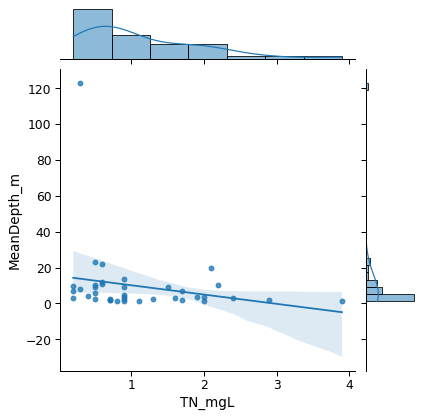

In [154]:
sns.jointplot(x='TN_mgL', y='MeanDepth_m', data=ldr, kind='reg')

ValueError: markers must be a singeton or a list of markers for each level of the hue variable

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

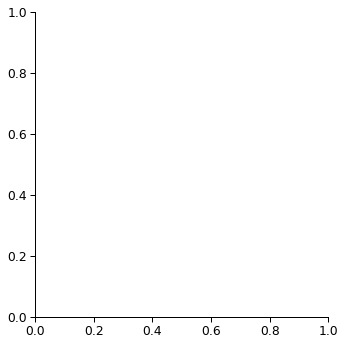

In [155]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

plt.figure(figsize=(8,6))

# We can plot a regression plot studying whether total bill effects the tip
# hue is used to show separation based off of categorical data
# We see that males tend to tip slightly more
# Define different markers for men and women
# You can effect the scatter plot by passing in a dictionary for styling of markers
sns.lmplot(x='MeanDepth_m', y='TN_mgL', hue='LakeName', data=ldr, markers=['o', '^'], 
          scatter_kws={'s': 100, 'linewidth': 0.5, 'edgecolor': 'w'})

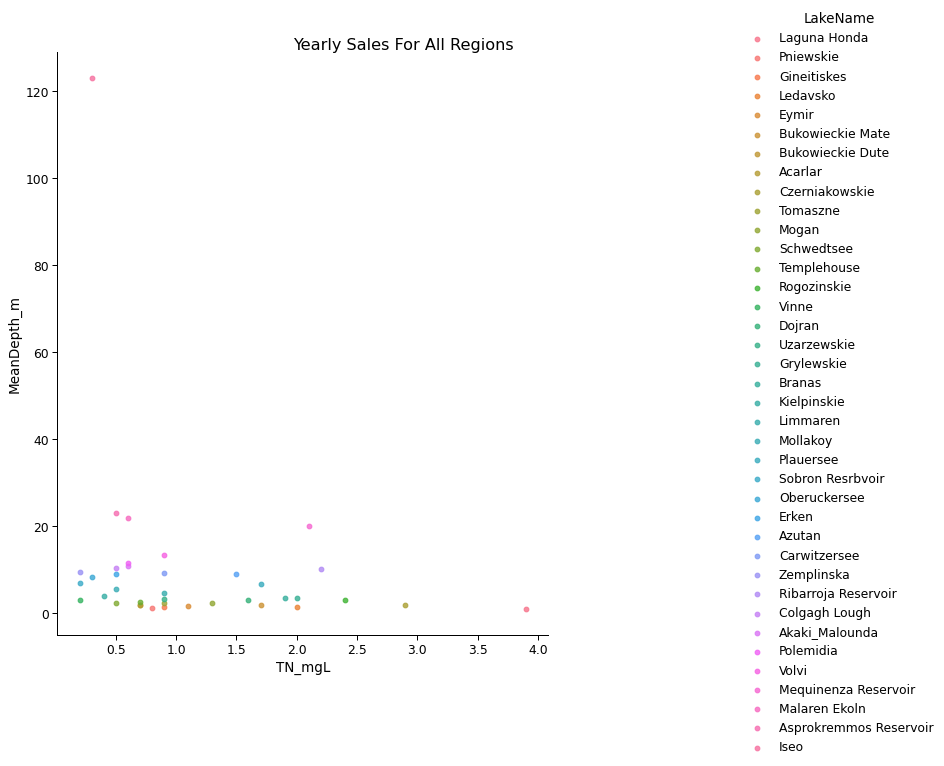

In [157]:
ax = sns.lmplot(data=ldr, x="TN_mgL",y="MeanDepth_m",hue="LakeName")
ax.fig.set_size_inches(15,10)
ax.fig.suptitle("Yearly Sales For All Regions")
plt.show()

Figure 1. .... Fig caption

Figure 1 Analaysis